In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from localization import datasets
from localization import models
from localization import samplers
from localization.experiments import supervise, autoencode, simulate, simulate_or_load, make_key
from localization.utils import ipr, plot_receptive_fields, plot_rf_evolution, build_gaussian_covariance, build_non_gaussian_covariance, entropy_sort, build_DRT
from scipy.special import erf
from tqdm import tqdm
import itertools

gaussian_cdf = lambda x: 0.5 * (erf(x/np.sqrt(2)) + 1)

In [3]:
# define config
config = dict(
    seed=0,
    num_dimensions=40,
    num_hiddens=2,
    # gain=0.01,#3,
    init_scale=0.01,
    activation='relu',
    model_cls=models.MLP,
    use_bias=False,
    optimizer_fn=optax.sgd,
    learning_rate=0.3,#10.0,
    batch_size=1000,#1000,
    num_epochs=1000,#500,
    # dataset_cls=datasets.SinglePulseDataset,
    dataset_cls=datasets.NonlinearGPDataset,
    # xi=(3., 0.1,),
    num_steps=1000,
    adjust=(-1.0, 1.0),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.xavier_normal_init,
    loss_fn='mse',
    save_=False,
    evaluation_interval=10,
)

gains = [0.01, 100]
hiddens = [1, 2, 40, 100]
xis = [(3., 0.1,), (0.1, 3,), (3, 3), (0.1, 0.1), (5, 1, 0.1)]

# log config to wandb
wandb_ = False

9it [00:02,  3.39it/s]


KeyboardInterrupt: 

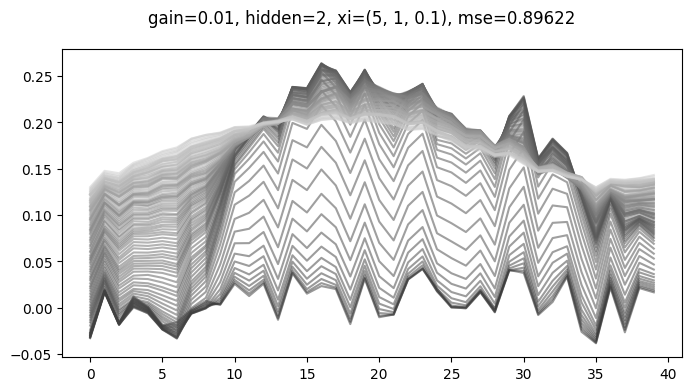

In [4]:
# run it
import os
from IPython.utils import io
for (gain, hidden, xi) in tqdm(itertools.product(gains, hiddens, xis)):
    config.update(dict(gain=gain, num_hiddens=hidden, xi=xi))
    with io.capture_output() as captured:
        weights, metrics = simulate_or_load(supervise=False, wandb_=wandb_, **config)
    os.makedirs(f'../thoughts/autoencoding/{gain}_{hidden}_{xi}/', exist_ok=True)
    for i in range(hidden):
        fig, axs = plot_rf_evolution(weights[:,[i],:], figsize=(8, 4))
        fig.suptitle(f'gain={gain}, hidden={hidden}, xi={xi}, mse={metrics[-1,1]:.5f}')
        fig.savefig(f'../thoughts/autoencoding/{gain}_{hidden}_{xi}/{i}.pdf')
        plt.close(fig)

In [14]:
config = dict(
  seed=0,
  num_dimensions=40,
  num_hiddens=2,
  gain=100,#0.01,#3,
  dim=2,
  init_scale=0.01,
  activation='relu',
  # activation='sigmoid',
  model_cls=models.MLP,
  use_bias=False,
  optimizer_fn=optax.sgd,
  # learning_rate=0.3,
  learning_rate=10.0,
  batch_size=1000,#1000,
  num_epochs=1000,#500,
  # dataset_cls=datasets.SinglePulseDataset,
  dataset_cls=datasets.NonlinearGPDataset,
  xi=(3., 0.1,),
  num_steps=1000,
  adjust=(-1.0, 1.0),
  class_proportion=0.5,
  sampler_cls=samplers.EpochSampler,
  init_fn=models.xavier_normal_init,
  loss_fn='mse',
  save_=True, # FIXME: Reset to False!
  evaluation_interval=10,
  beta=0.5,
  rho=0.05,
  # rho=None,
)

In [33]:
# define config
config = dict(
    seed=0,
    num_dimensions=40,
    dim=2,
    # num_hiddens=60,
    num_hiddens=10,
    gain=100,
    # gain=0.01,
    init_scale=0.1,#0.01,
    activation='relu',
    model_cls=models.SimpleNet,
    # model_cls=models.MLP,
    use_bias=False,
    optimizer_fn=optax.sgd,
    learning_rate=2,#3.0,
    batch_size=1000,
    num_epochs=1000,
    # dataset_cls=datasets.NonlinearGPCountDataset,
    dataset_cls=datasets.NonlinearGPDataset,
    # xi=(5, 4,),
    # xi=(0.5, 0.4,),
    # xi=(5, 4, 0.3, 0.2, 0.1,),
    xi=(3, 0.1),
    num_steps=1000,
    adjust=(-1.0, 1.0),
    class_proportion=0.5,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.xavier_normal_init,
    loss_fn='mse',
    save_=True,
    evaluation_interval=10,
)

Already simulated
0.11061783134937286


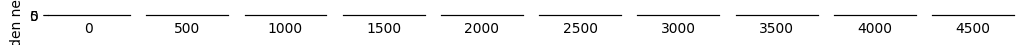

In [34]:
weights, metrics = simulate_or_load(supervise=True, wandb_=False, **config)
print(metrics[-1,1])
_ = plot_receptive_fields(weights[-10:], num_cols=12, figsize=(15, 5), sort_fn=entropy_sort, ind=-1)

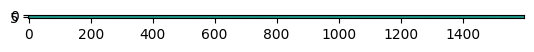

In [35]:
_ = plt.imshow(weights[-1])

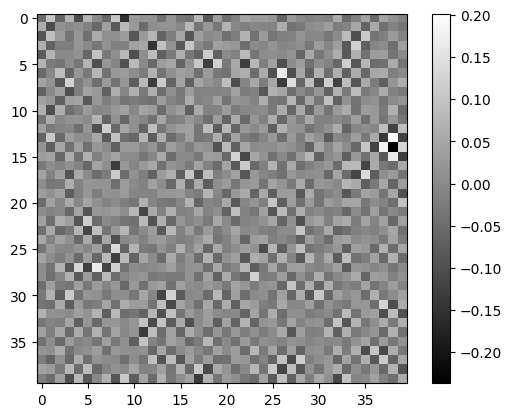

In [42]:
im = plt.imshow( weights[-1,3].reshape(40, 40), cmap = 'gray')
cbar = plt.colorbar(im)

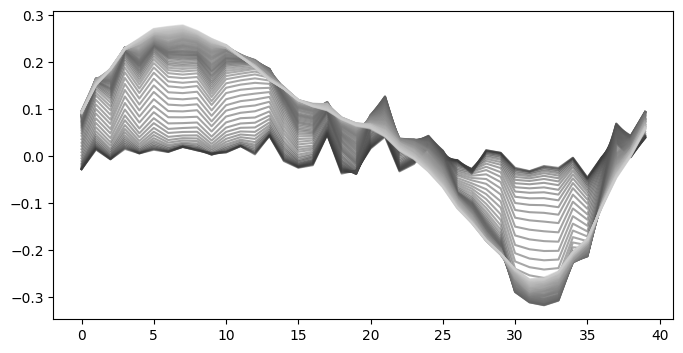

In [17]:
_ = plot_rf_evolution(weights[:,[0],:], figsize=(8, 4))

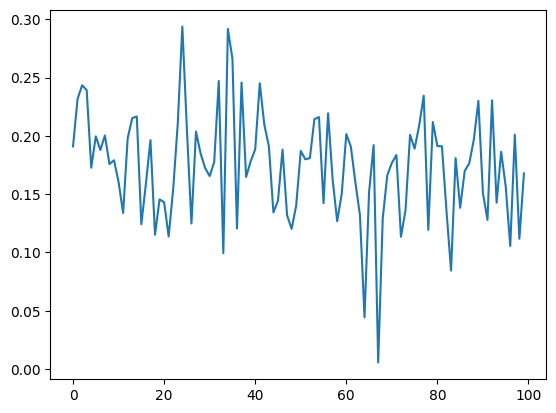

In [5]:
_ = plt.plot(weights[-1,:,:].max(axis=1))

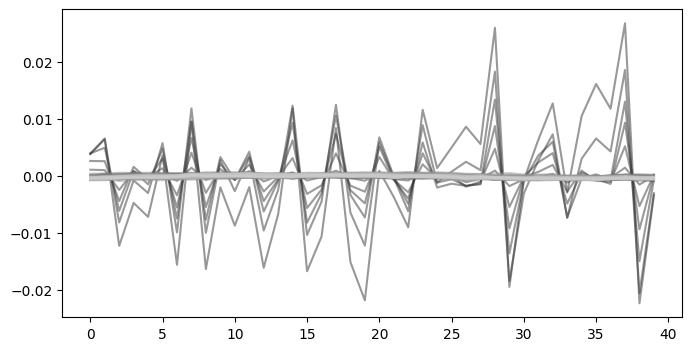

In [8]:
_ = plot_rf_evolution(weights[:,[2],:], figsize=(8, 4))